In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = load_iris()

X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

In [3]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C = 1, loss = 'hinge'))
])

In [4]:
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [6]:
from sklearn.svm import SVC

In [7]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', SVC(kernel = 'linear', C = 1))
])

In [8]:
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [9]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [10]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [11]:
X, y = make_moons(noise = 0.2)

In [12]:
polynomial_svm_clf = Pipeline([
    ('poly_feature', PolynomialFeatures(degree = 3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(max_iter = 10000, C = 10, loss = 'hinge'))
])

In [13]:
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_feature',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=10000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [14]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'X2')

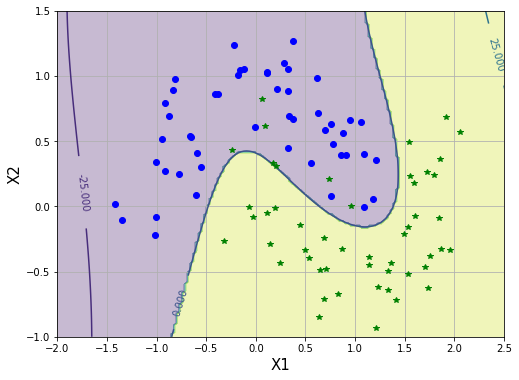

In [15]:
x0, x1 = np.meshgrid(
    np.linspace(-2, 3.5, 200).reshape(-1, 1),
    np.linspace(-1, 2.5, 200).reshape(-1, 1)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

y_pred = polynomial_svm_clf.predict(X_new).reshape(x0.shape)
y_prob = polynomial_svm_clf.decision_function(X_new).reshape(x0.shape)

plt.figure(figsize = (8, 6))

plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g*')

plt.contourf(x0, x1, y_pred, alpha = 0.3)
contour = plt.contour(x0, x1, y_prob)
plt.clabel(contour, inline = True, fontsize = 10)

plt.axis([-2, 2.5, -1, 1.5])
plt.grid(True)
plt.xlabel('X1', fontsize = 15)
plt.ylabel('X2', fontsize = 15, )

In [16]:
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [17]:
X, y = make_moons(noise = 0.2)

In [18]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 5,
                   probability = True))
])

In [19]:
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [20]:
def plot_contourf_graph():
    x0, x1 = np.meshgrid(
        np.linspace(-2, 3.5, 200).reshape(-1, 1),
        np.linspace(-2, 2.5, 200).reshape(-1, 1)
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = poly_kernel_svm_clf.predict(X_new).reshape(x0.shape)
    y_prob = poly_kernel_svm_clf.predict_proba(X_new)[:, 0].reshape(x0.shape)
    
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'b*')
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'gs')
    
    plt.contourf(x0, x1, y_pred, alpha = 0.3)
    contour = plt.contour(x0, x1, y_prob)
    plt.clabel(contour, inline = True)
    plt.xlabel('X1', fontsize = 15)
    plt.ylabel('X2', fontsize = 15)

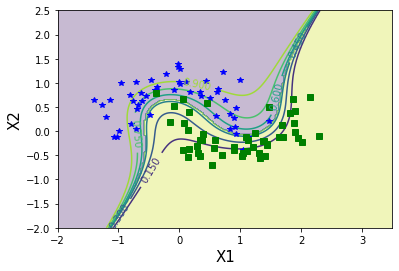

In [21]:
plot_contourf_graph()

In [22]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 0.001))
])

In [23]:
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

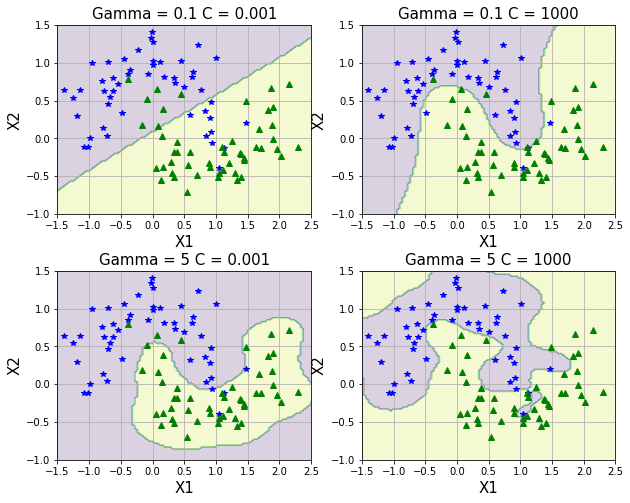

In [24]:
fig = plt.figure(figsize = (10, 8))
fig.subplots_adjust(hspace = 0.3)
count = 1

for g in [0.1, 5]:
    for c in [0.001, 1000]:
        tmp_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svm_clf', SVC(kernel = 'rbf', gamma = g, C = c))
        ])

        tmp_pipeline.fit(X, y)

        x0, x1 = np.meshgrid(
            np.linspace(-1.5, 2.6, 100),
            np.linspace(-1.0, 1.6, 100)
        )

        X_new = np.c_[x0.reshape(-1, 1), x1.reshape(-1, 1)]

        y_pred = tmp_pipeline.predict(X_new).reshape(x0.shape)

        axs = fig.add_subplot(2, 2, count)

        axs.plot(X[y == 0, 0], X[y == 0, 1], 'b*')
        axs.plot(X[y == 1, 0], X[y == 1, 1], 'g^')

        axs.contourf(x0, x1, y_pred, alpha = 0.2)

        axs.set_title('Gamma = '+str(g)+' C = '+str(c), fontsize = 15)
        axs.set_xlabel('X1', fontsize = 15)
        axs.set_ylabel('X2', fontsize = 15)
        axs.grid(True)
        axs.axis([-1.5, 2.5, -1.0, 1.5])
        
        count += 1

# SVM Regression

In [99]:
from sklearn.svm import LinearSVR

In [100]:
X = 6*np.random.rand(100, 1)-4
y = (0.5*X**2+X+5+np.random.rand(100, 1)).ravel()

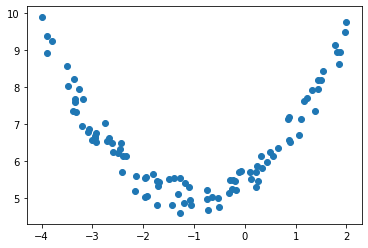

In [101]:
plt.scatter(X.ravel(), y)

In [104]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [137]:
svm_reg = LinearSVR(epsilon = 1)
svm_reg.fit(X_poly, y)

LinearSVR(C=1.0, dual=True, epsilon=1, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'y')

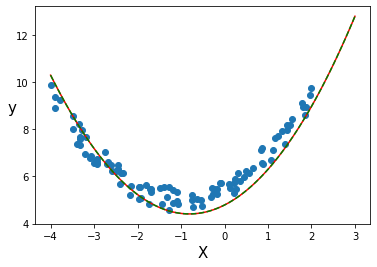

In [146]:
X_range = np.linspace(-4, 3, 100).reshape(-1, 1)
X_test_poly = poly_features.transform(X_range)

y_pred = svm_reg.predict(X_test_poly)

plt.scatter(X, y)
plt.plot(X_range, y_pred, 'red')
plt.plot(X_range, svm_reg.coef_[1]*X_test_poly[:, 1]+svm_reg.coef_[0]*X_test_poly[:, 0]+svm_reg.intercept_, 'g--')

plt.xlabel('X', fontsize = 15, rotation = 0) 
plt.ylabel('y', fontsize = 15, rotation = 0)

In [139]:
svm_reg.coef_

array([0.93575402, 0.57834222])

In [140]:
svm_reg.intercept_

array([4.78737906])

In [154]:
def plot_decision_lines(svm_reg, xmin, xmax):
    w = svm_reg.coef_
    b = svm_reg.intercept_
    
    x0 = np.linspace(xmin, xmax, 200)
    
    # w0*x0 + w1*x1 + b = 0
    # x1 = -(w0*x0 + b)/w1
    # x1 = -w0*x0/w1 - b/w1
    
    decision_boundary = -w[0]*x0/w[1]-b/w[1]
    margin = 1/w[1]
    
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    plt.plot(X[svm_reg.support_, 0], X[svm_reg.support_, 1], s = 180,
            facecolors = '#FFAAAA')
    plt.plot(x0, decision_boundary, 'black')
    plt.plot(x0, gutter_up, 'k--')
    plt.plot(x0, gutter_down, 'k--')

In [155]:
plot_decision_lines(svm_reg, -2, 2)

AttributeError: 'LinearSVR' object has no attribute 'support_'